# 第2章 感知器

> Perceptron

## 2.1 感知器模型

__定义__：假设输入空间(特征空间)是$\mathcal{X} \subseteq \mathbf{R}^n$，输出空间是$\mathcal{Y}=\{+1,-1\}$。输入$\mathbf{x} \in \mathcal{X}$表示实例的特征向量，对应于输入空间(特征空间)的点；输出$y \in \mathcal{Y}$表示实例的类别。由输入空间到输出空间的如下函数：

$$f(\mathbf{x})=sign(\mathbf{w}·\mathbf{x}+b)$$

称为__感知器(Perceptron)__。

其中，$\mathbf{w}$和$b$是感知器参数，$\mathbf{w} \in \mathbf{R}^n$叫做权值，$b \in \mathbf{R}$叫做偏置。

感知器是一种__线性分类模型__。假设空间是定义在特征空间中的所有__线性分类模型__，即$\{f\ |\ f(\mathbf{x})=\mathbf{w}·\mathbf{x}+b\}$

感知器的__几何解释__：一个感知器模型，对应$\mathbf{R}^n$中的一个超平面$S: \mathbf{w}·\mathbf{x}+b=0$，$\mathbf{w}$是超平面的法向量，$b$是超平面的截距。该超平面将输入空间划分为两大部分，两个部分的点分别为分为正类和负类。因此，超平面$S$又被称为__分离超平面__($\mathbf{w}$的方向指向正类，反方向为负类)。

当然，我们可以将偏置项$b$并入权重$\mathbf{w}$中，作为$w^{(0)}$，这样做的同时需要在$\mathbf{x}$中添加“第0维”，即$x^{(0)}=1$。这样，我们可以将感知器写成：

$$f(\mathbf{x}) = sign(\mathbf{w}·\mathbf{x})$$

## 2.2 感知器学习策略

### 一. 数据集的线性可分性

__数据集的线性可分(Linear Separable)__：存在某个超平面$S$能够将数据集的正实例点和负实例点完全正确地划分到超平面的两侧，则称该数据集是线性可分的。

### 二. 学习策略

首先选择__损失函数__：

* 使用__误分类点的总数__？但这样的损失函数不是$\mathbf{w}$的连续可导函数，不易最优化，舍弃；
* 使用__误分类点到超平面$S$的总距离__！例如，点$\mathbf{x_0}$到超平面$S$的距离为：($\mathbf{w^-}$表示原权重向量)

$$\frac{1}{\|\mathbf{w^-}\|}|\mathbf{w}·\mathbf{x_0}|$$

对于误分类点$(\mathbf{x_i},y_i)$，有：

$$-y_i\mathbf{w}\mathbf{x_i} > 0$$

那么，误分类点$(\mathbf{x_i},y_i)$到超平面$S$的距离为：

$$-\frac{1}{\|\mathbf{w^-}\|}y_i \mathbf{w}\mathbf{x_i}$$

假设误分类点的集合为$M$，那么所有误分类点到超平面的总距离为：

$$-\frac{1}{\|\mathbf{w^-}\|} \sum_{x_i \in M} y_i \mathbf{w}\mathbf{x_i}$$

【这里需要再阐明！】不考虑$\frac{1}{\|\mathbf{w}^-\|}$，得到感知器的经验损失为：

$$L(\mathbf{w}) = -\sum_{x_i \in M} y_i \mathbf{w}\mathbf{x_i}$$

所以，最优化问题为：

$$\underset{\mathbf{w}}{min}\ L(\mathbf{w}) = -\sum_{x_i \in M} y_i \mathbf{w}\mathbf{x_i}$$

## 2.3 感知器学习算法

### 一. 原始形式

使用__随机梯度下降__求解上述最优化问题。

假设误分类点集合$M$固定，则有：

$$\nabla_{\mathbf{w}}L = -\sum_{x_i \in M} y_i\mathbf{x_i}$$

因此，使用随机梯度下降，每次随机选取一个误分类点$(\mathbf{x_i},y_i)$进行更新：

$$\mathbf{w}_{t+1} = \mathbf{w}_t + \eta y_i\mathbf{x_i}$$

直到训练集中没有误分类的点。

直观解释：当一个实例被误分，则调整$\mathbf{w}$，使得超平面向该误分点一侧移动，以减少该点到超平面的距离，直至越过该误分点，使其被正确分类。

注意，不同的初值$\mathbf{w_0}$或过程中选择不同的误分类点，最后得到的超平面可能不同——因为线性可分数据本来就存在不止一个满足条件的超平面。

### 二. 收敛性证明

对于线性可分的数据集，感知器学习算法的原始形式能够__收敛__——经过__有限次迭代__得到一个将训练数据完全正确划分的分离超平面。

__Novikoff定理__：设训练数据集$T=\{(\mathbf{x_1},y_1),(\mathbf{x_2},y_2),\cdots,(\mathbf{x_N},y_N)\}$是线性可分的，其中$\mathbf{x_i} \in \mathcal{X}=\mathbf{R}^n$，$y_i \in \mathcal{Y}=\{-1,+1\}$，$i=1,2,\cdots,N$，则：

1. 存在满足条件$\|\mathbf{w_{opt}}\|=1$的超平面$\mathbf{w_{opt}}\mathbf{x}=0$将训练集完全正确分开；且存在$\gamma>0$，对所有$i=1,2,\cdots,N$：

$$y_i\mathbf{w_{opt}}\mathbf{x_i} \geq \gamma$$

2. 令$R=\underset{1\leq i\leq N}{max}\|\mathbf{x_i}\|$，则感知器算法在训练数据集上的误分类次数k满足不等式：

$$k\leq \Big(\frac{R}{\gamma}\Big)^2$$

__证明__：

1)

因为训练集线性可分，由线性可分的定义可知，一定存在某个分离超平面能将训练集完全正确分开，不妨将该超平面记做$\mathbf{w_{opt}}·\mathbf{x}=0$，并令$\|\mathbf{w_{opt}}\|=1$，因为放缩$\mathbf{w}$并不改变平面。

因为该超平面可以将训练集中的所有点完全正确分开，所以对所有$i=1,2,\cdots,N$：

$$y_i\mathbf{w_{opt}}\mathbf{x_i} \geq 0$$

所以存在

$$\gamma = \underset{i}{min}\{y_i\mathbf{w_{opt}}\mathbf{x_i}\}$$

使

$$y_i\mathbf{w_{opt}}\mathbf{x_i} \geq \gamma$$

2)

假设感知器从$\mathbf{w_{0}}=\mathbf{0}$开始更新，第k次更新为$\mathbf{w_{k}}=\mathbf{w_{k-1}}+\eta y_{n(k-1)}\mathbf{x_{n(k-1)}}$，有：

$$\mathbf{w_{opt}}\mathbf{w_k}=\mathbf{w_{opt}}\mathbf{w_{k-1}}+\eta y_{n(k-1)}\mathbf{w_{opt}}\mathbf{x_{n(k-1)}} \geq \mathbf{w_{opt}}\mathbf{w_{k-1}}+\eta\gamma$$

递推得：

$$\mathbf{w_{opt}}\mathbf{w_k} \geq \mathbf{w_{opt}}\mathbf{w_{k-1}}+\eta\gamma \geq \mathbf{w_{opt}}\mathbf{w_{k-2}}+2\eta\gamma \geq \cdots \geq k\eta\gamma$$

即(__式一__)：

$$\mathbf{w_{opt}}\mathbf{w_k} \geq k\eta\gamma$$

对于$\mathbf{w_k}$，有：

$$\|\mathbf{w_k}\|^2 = \|\mathbf{w_{k-1}}\|^2+2\eta y_{n(k-1)}\mathbf{w_{k-1}}\mathbf{x_{n(k-1)}}+\eta^2\|\mathbf{x_{n(k-1)}}\|^2 \leq \|\mathbf{w_{k-1}}\|^2 + \eta^2\|\mathbf{x_{n(k-1)}}\|^2$$

由题目关于$R$的定义可知：

$$\|\mathbf{w_k}\|^2 \leq \|\mathbf{w_{k-1}}\|^2 + \eta^2\|\mathbf{x_{n(k-1)}}\|^2 \leq \|\mathbf{w_{k-1}}\|^2 + \eta^2R^2$$

同样递推可得(__式二__)：

$$\|\mathbf{w_k}\|^2 \leq k\eta^2R^2$$

最后，由式一、式二、以及权重向量模为1得：

$$k\eta\gamma \leq \mathbf{w_{opt}}\mathbf{w_k} \leq \|\mathbf{w_{opt}}\|\|\mathbf{w_k}\| \leq \|\mathbf{w_k}\| \leq \sqrt{k}\eta R$$

故有：

$$k\leq \Big(\frac{R}{\gamma}\Big)^2$$

上述定理证明，当训练集线性可分时，迭代次数k是有上界的，即可以经过有限次搜索找到将训练集完全正确分开的分离超平面。

### 三. 对偶形式

Dual的思路：将$\mathbf{w}$表示为$y_i\mathbf{x_i}$的线性组合，然后求解系数，即：

$$\mathbf{w} = \sum_{i=1}^{N}\alpha_iy_i\mathbf{x_i}$$

其中，

$$\alpha_i \geq 0,\ i=1,2,\cdots,N$$

Why?若将$\mathbf{w}$的初始值设为$\mathbf{0}$，假设在更新的$n$次里，第$i$个样本点被更新了$n_i$次，则$y_i\mathbf{x_i}$前的系数是$n_i\eta$，即$\alpha_i = n_i\eta$。

__感知器学习算法的对偶形式__：

* __输入__：线性可分的数据集$T$，学习率$\eta$；
* __输出__：$\mathbf{\alpha} = (\alpha_1, \alpha_2, \cdots, \alpha_N)^T$；感知器模型$f(\mathbf{x})=sign\Big(\sum_{j=1}^N\alpha_jy_j\mathbf{x_j}·\mathbf{x}\Big)$
* __算法__：
    1. $\mathbf{\alpha} = \mathbf{0}$
    2. 在训练集中选取数据$(\mathbf{x_i},y_i)$
    3. 若$y_i\Big(\sum_{j=1}^N\alpha_jy_j\mathbf{x_j}·\mathbf{x_i}\Big) \leq 0$，执行更新$\alpha_i = \alpha_i+\eta$；
    4. 转至2直到没有误分类的数据。

对偶形式中，训练实例仅以内积的形式出现。为了方便，可以预先将训练集实例间的内积计算出来并以矩阵的形式存储起来，这个矩阵就是所谓的Gram矩阵(Gram Matrix)：

$$G=[x_i·x_j]_{N×N}$$


## 2.4 感知器的Python实现

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [170]:
# 边际可视化
from matplotlib.colors import ListedColormap

# classification <= 5
def plot_decision_regions(X, y, classifier=None, scaler = None, resolution=0.02, need_samples=1):
    # setup marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # In this way, we can just draw a scatter pic
    if classifier:
        # plot the decision surface
        x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
        x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
        xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                              np.arange(x2_min,x2_max,resolution))
        temp = np.array([xx1.ravel(),xx2.ravel()]).T
        if scaler:
            temp = scaler.transform(temp)
        Z = classifier.predict(temp)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
    
    if need_samples:
        # plot class samples
        for idx,cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y==cl,0],
                        y=X[y==cl,1],
                        alpha=0.8,
                        c=colors[idx],
                        marker=markers[idx],
                        label=cl,
                        edgecolor='black')

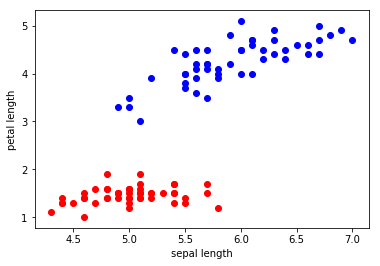

In [272]:
from sklearn.datasets import load_iris

iris = load_iris()
data = iris.data
target = iris.target
# setosa是-1, versicolor是1
# x1是sepal length, x2是petal length
X = data[target!=2][:,[0,2]]
y = target[target!=2]
y = np.where(y==0,-1,1)
# 作图
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.scatter(X[y==-1,0],X[y==-1,1],color='r')
plt.scatter(X[y==1,0],X[y==1,1],color='b');

### 1. primal形式

In [200]:
class Perceptron:
    """Perceptron classifier.
    Parameters
    --------------
    eta : float
        Learning rate
    random_state : int
        random seed
        
    Attributes
    --------------
    w_ : 1d-array
        Weights
    errors_ : list
        Number of updates in each epoch
    """
    
    def __init__(self, eta=0.01, random_state=1):
        self.eta = eta
        self.random_state = random_state
    
    def fit(self, X, y):
        """Fitting training data.
        Parameters
        --------------
        X : nd-array, shape = [n_samples, n_features]
            Training vectors
        y : 1d-array, shape = [n_samples,]
            Target values
        
        Return
        --------------
        self : object
        """ 
        n_samples = X.shape[0]        # n_samples
        n_features = X.shape[1]       # n_features
        # Initialization
        self.w_ = np.zeros(n_features+1)
        self.errors = []
        rgen = np.random.RandomState(self.random_state)
        index = rgen.permutation(range(n_samples))         # Random index of samples
        updates = 0                                        # Total updates
        # Add 0-dimension
        X_add = np.hstack([np.ones((n_samples,1)), X])
        # Start
        while True:
            errors = 0
            for xi,target in zip(X_add[index],y[index]):
                y_hat = np.sign(np.dot(xi,self.w_))
                y_hat = -1 if y_hat==0 else y_hat
                if y_hat != target:
                    errors += 1
                    self.w_ += eta * target * xi
            self.errors.append(errors)
            if errors == 0:
                break
            updates += errors
        return self
    
    def predict(self, X):
        scores = np.dot(X,self.w_[1:])+self.w_[0]
        return np.where(scores > 0, 1, -1)

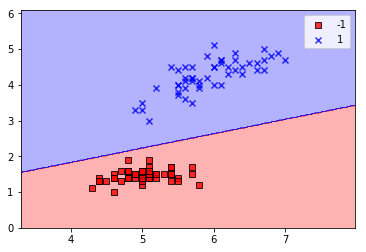

In [288]:
# 测试
ppn = Perceptron(eta=0.1, random_state=0)
ppn.fit(X,y)
plot_decision_regions(X,y,classifier=ppn)
plt.legend();

### 2. dual形式

In [281]:
class DualPerceptron:
    """Perceptron classifier-Dual.
    Parameters
    --------------
    eta : float
        Learning rate
    random_state : int
        random seed
        
    Attributes
    --------------
    alpha_ : 1d-array
        Weights for each sample
    errors_ : list
        Number of updates in each epoch
    X_add_ : nd-array, shape = [n_samples, n_features+1]
        Training vectors added 0-dimension for prediction
    y_ : 1d-array, shape = [n_samples,]
        Target values for prediction
    """
    
    def __init__(self, eta=0.01, random_state=1):
        self.eta = eta
        self.random_state = random_state
    
    def fit(self, X, y):
        """Fitting training data.
        Parameters
        --------------
        X : nd-array, shape = [n_samples, n_features]
            Training vectors
        y : 1d-array, shape = [n_samples,]
            Target values
        
        Return
        --------------
        self : object
        """ 
        n_samples = X.shape[0]        # n_samples
        n_features = X.shape[1]       # n_features
        # Add 0-dimension
        X_add = np.hstack([np.ones((n_samples,1)), X])
        # Initialization
        self.X_add_ = X_add
        self.y_ = y
        self.alpha_ = np.zeros(n_samples)
        self.errors = []
        rgen = np.random.RandomState(self.random_state)
        index = rgen.permutation(range(n_samples))         # Random index of samples
        updates = 0                                        # Total updates
        # Gram Matrix
        gram = X_add.dot(X_add.T)
        # Start
        while True:
            errors = 0
            for i in index:
                y_hat = np.sign((self.alpha_*y).dot(gram[:,i]))
                y_hat = -1 if y_hat==0 else y_hat
                if y_hat != y[i]:
                    errors += 1
                    self.alpha_[i] += eta
            self.errors.append(errors)
            if errors == 0:
                break
            updates += errors
        return self
    
    def predict(self, X):
        X = np.array(X)
        if len(X.shape) == 1:
            X_add = np.hstack([1,X])
        else:
            X_add = np.hstack([np.ones((X.shape[0],1)),X])
        scores = ((self.alpha_*self.y_).T).dot(self.X_add_.dot(X_add.T))
        return np.where(scores > 0, 1, -1)

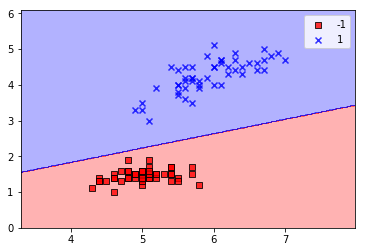

In [287]:
# 测试
ppn_dual = DualPerceptron(eta=0.1, random_state=0)
ppn_dual.fit(X,y)
plot_decision_regions(X,y,classifier=ppn_dual)
plt.legend();